# PCA - EXERCISE

###### The challenge:

In an astronomical observation, researchers used 17 different bands of the spectrum to analyze 4 celestial objects. Using the PCA -Principal component analysis find out which of the 4 celestial objects does not behave like a star.

### Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

### Import data

In [4]:
data_bands = pd.read_csv('PCA_Data.csv',sep=';',index_col=0)

In [5]:
data_bands.head()

,Object 1,Object 2,Object 3,Object 4
Banda,,,,
Band 1,375,135,458,475
Band 2,57,47,53,73
Band 3,245,267,242,227
Band 4,1472,1494,1462,1582
Band 5,105,66,103,103


I will also use the dataframe in which the rows are the objects.

In [6]:
data_bands.T

Banda,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16,Band 17
Object 1,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
Object 2,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
Object 3,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
Object 4,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175


###### First we are going to visualize the values of the bands for each object in the following graph.

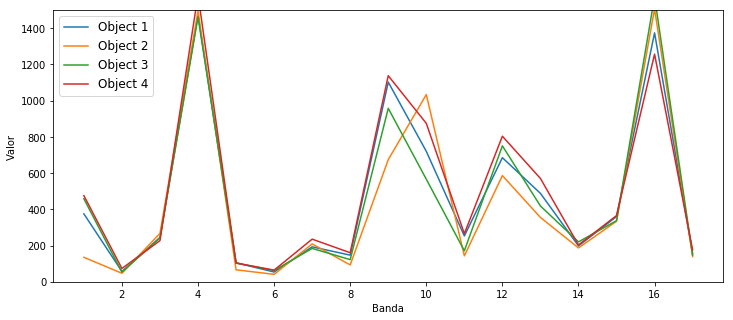

In [18]:
pl.figure(figsize=((12, 5)))
for i, k in zip(data_bands.T.index,range(4)):
    l = pl.plot([j for j in range(1,18)], data_bands.T[data_bands.T.index==i].values.reshape(17,)+ 0.15 * k)
    c = l[0].get_color()
pl.ylim(0, 1500)
pl.xlabel('Banda')
pl.ylabel('Valor')
plt.legend(data_bands.T.index,prop={'size': 12})

The first thing is to visually search if one of the objects has values ​​in its bands different from the rest. It can be seen is that Object 2 has similar values to the rest with the exception of bands 1, 9 and 10. **This gives us the first clue that Object 2 is the one that does not behave like a star**.

### Correlation matrix

The next thing to do is look for the correlation of the Ojects taking the values of the bands. For this, the data will be used as follows.

In [8]:
data_bands.head()

,Object 1,Object 2,Object 3,Object 4
Banda,,,,
Band 1,375,135,458,475
Band 2,57,47,53,73
Band 3,245,267,242,227
Band 4,1472,1494,1462,1582
Band 5,105,66,103,103


Pearson's correlation will be used.

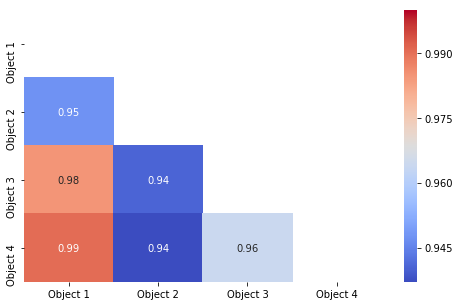

In [9]:
f, ax = plt.subplots(figsize=(8, 5))
matrix = np.triu(data_bands.corr(method='pearson'))
sns.heatmap(data_bands.corr(method='pearson'), annot=True, mask=matrix,cmap= 'coolwarm')

The previous graph shows the correlation between the objects. The highest correlation is between Object 1 and Object 4 with 0.99, that is, the values of their bands are very close (they are measurements of the same phenomenon). The lowest values (closest to 0) belong to object 2, it has a correlation 0.94 with Object 3 and 4; and 0.95 with object 1. This indicates that the values of the bands of objects 1,3 and 4 are very close and that the values of object 2 are more distant from the rest, which can be verified with the first graph. **This is an additional clue that tells us that Object 2 is the one that behaves differently.**

### Principal Component Analysis (PCA)

Now I have 17 bands per element, but I could have thousands, and what was done in the previous points could not be replicated or would be very expensive. Therefore PCA is used.

I will apply PCA, I will use the Sklearn library. The measurements are of the same phenomenon, so I am not going to standardize the data.

The data will be used as follows.

In [10]:
X= data_bands.T
X.head()

Banda,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16,Band 17
Object 1,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
Object 2,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
Object 3,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
Object 4,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175


I only have 4 rows (objects), therefore, at most we can generate 4 components.

In [11]:
pca = PCA(n_components=4)
X_projected = pca.fit_transform(X)  

In [12]:
X_projected

array([[-1.44993152e+02, -2.53299944e+00,  1.05768945e+02,
         4.29156850e-14],
       [ 4.77391639e+02, -5.89018618e+01, -4.87789535e+00,
         4.29156850e-14],
       [-9.18693390e+01,  2.86081786e+02, -4.44154950e+01,
         4.29156850e-14],
       [-2.40529148e+02, -2.24646925e+02, -5.64755547e+01,
         4.29156850e-14]])

I will put the result in the following dataframe.

In [13]:
data_bands_PCA = pd.DataFrame(data = X_projected, columns = ['PC 1', 'PC 2','PC 3', 'PC 4'], index=data_bands.T.index)
data_bands_PCA.head()

,PC 1,PC 2,PC 3,PC 4
Object 1,-144.993152,-2.532999,105.768945,4.291569e-14
Object 2,477.391639,-58.901862,-4.877895,4.291569e-14
Object 3,-91.869339,286.081786,-44.415495,4.291569e-14
Object 4,-240.529148,-224.646925,-56.475555,4.291569e-14


#### Explained Variance

To find out how many principal components to consider I am going to use the explained variance. This tells you how much information (variance) can be attributed to each of the principal components. It is important because when applying PCA information is lost (variance). I will use the attribute **"explained_variance_ratio_"**.

In [74]:
[round(float(x)*100,2) for x in pca.explained_variance_ratio_]

[67.44, 29.05, 3.5, 0.0]

 The first principal component contains 67.44% of the variance and the second principal component contains 29.05% of the variance. Together, the two components contain 96.49% of the information.

I will use the first two principal components. I'm going to graph them.

In [14]:
pc_1 = X_projected[:,0]
pc_2 = X_projected[:,1]

<Figure size 432x288 with 0 Axes>

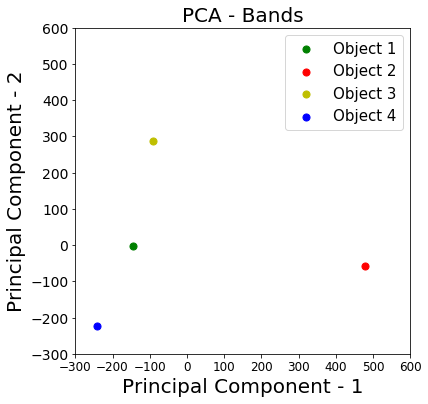

In [15]:
plt.figure()
plt.figure(figsize=(6,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA - Bands",fontsize=20)
targets = ['Object 1', 'Object 2' ,'Object 3' ,'Object 4']
colors = ['g', 'r' ,'y','b']
for target, color in zip(targets,colors):
    indicesToKeep = data_bands.T.index == target
    plt.scatter(pc_1[indicesToKeep], pc_2[indicesToKeep], c = color, s = 50)
axes = plt.gca()
axes.set_xlim([-300,600])
axes.set_ylim([-300,600])
plt.legend(['Object 1', 'Object 2' ,'Object 3' ,'Object 4'],prop={'size': 15})

You can see that objects 1,3 and 4 are quite close to each other, and it is object 2 that has far values in the first two principal components. Therefore, we can conclude again that this **object 2 is the one that does not behave like the rest.**

If we look at the figure again, also note that only the first principal component can be used to reach the conclusion. The value of object two is quite far from the rest.

In [97]:
data_bands_PCA[['PC 1']].T

,Object 1,Object 2,Object 3,Object 4
PC 1,-144.993152,477.391639,-91.869339,-240.529148


In order to see which bands explain why the value of object 2 in the first component is distant, we will use the set of all eigenvectors. The "most important" bands will be those with a higher absolute value.

In [99]:
pca.components_

array([[-0.46396817, -0.02618776,  0.04792763, -0.04770286, -0.05695538,
        -0.0296502 , -0.00519362, -0.08441498, -0.6326409 ,  0.40140206,
        -0.15184994, -0.25891666, -0.24359373, -0.02688623, -0.03648827,
         0.23224414, -0.03762098],
       [ 0.11353652, -0.03056054,  0.01391582, -0.21259968,  0.01601285,
         0.00594992, -0.09538866, -0.05075495, -0.17774074, -0.71501708,
        -0.14490027, -0.01533114, -0.22545092,  0.04285076, -0.0454518 ,
         0.55512431, -0.0430217 ],
       [-0.4985832 , -0.0413586 ,  0.06367111, -0.35884921,  0.02394295,
        -0.05232164, -0.12522257,  0.03906481,  0.40012865, -0.20668248,
         0.21382237, -0.55384854, -0.05332841, -0.07364902,  0.05289191,
        -0.16942648, -0.03605745],
       [-0.47785489, -0.52586813,  0.31308069, -0.01891273,  0.04202047,
         0.05722325, -0.00073606, -0.01776974,  0.19060366, -0.01786574,
        -0.19179373,  0.51346182,  0.17668067,  0.07154808, -0.05410841,
         0.11692261

I'm going to graph these values by principal component:

Text(0,0.5,'Value')

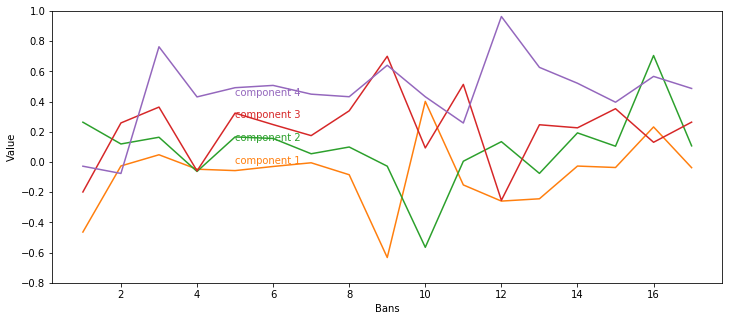

In [16]:
pl.figure(figsize=((12, 5)))
l = pl.plot([i for i in range(1,18)], pca.mean_ - 0.15)
c = l[0].get_color()
for i in range(4):
    l = pl.plot([i for i in range(1,18)], pca.components_[i] + 0.15 * i)
    c = l[0].get_color()
    pl.text(5, -0.01 + 0.15 * i, "component %i" % (i + 1), color=c)
pl.ylim(-0.8, 1)
pl.xlabel('Bans')
pl.ylabel('Value')

It can be seen that the bands with the greatest weight for the first component are bands 1, 9 and 10. These bands allow us to differentiate object 2 from the rest, which fits what was observed in the first graph. (Which is next)

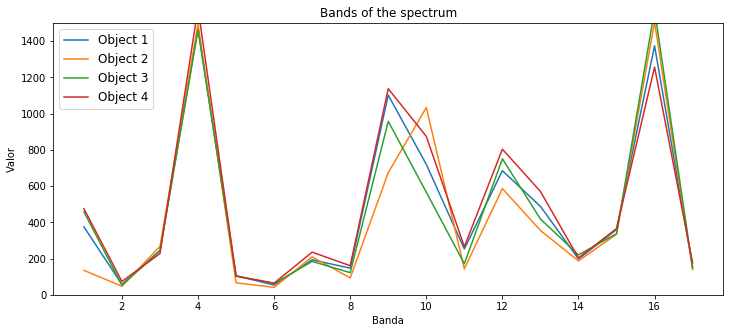

In [17]:
pl.figure(figsize=((12, 5)))
for i, k in zip(data_bands.T.index,range(4)):
    l = pl.plot([j for j in range(1,18)], data_bands.T[data_bands.T.index==i].values.reshape(17,)+ 0.15 * k)
    c = l[0].get_color()
pl.ylim(0, 1500)
pl.xlabel('Banda')
pl.ylabel('Valor')
pl.title('Bands of the spectrum')
plt.legend(data_bands.T.index,prop={'size': 12})

#### In conclusion, celestial object 2 does not behave like a star.